In [1]:
import tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
xtrain[0].shape

(28, 28)

In [8]:
# to make 3d
xtrain[0].reshape(28,28,1)

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [9]:
print('(28,28)=',xtrain[0])
print('(28,28,1)=',xtrain[0].reshape(28,28,1))

(28,28)= [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

In [10]:
model=Sequential()

In [11]:
#step1 layer-convolution,maxpool
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',strides=(1,1),padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=(1,1),padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
# step2:fully connectes layers
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       45100     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 100)         90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 100)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [13]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [15]:
t_hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20,verbose=1,batch_size=500)

Epoch 1/20
120/120 [==============================] - 165s 1s/step - loss: 0.0955 - accuracy: 0.9650 - val_loss: 0.3541 - val_accuracy: 0.9029
Epoch 2/20
120/120 [==============================] - 144s 1s/step - loss: 0.0853 - accuracy: 0.9686 - val_loss: 0.3846 - val_accuracy: 0.9009
Epoch 3/20
120/120 [==============================] - 143s 1s/step - loss: 0.0774 - accuracy: 0.9708 - val_loss: 0.4156 - val_accuracy: 0.8953
Epoch 4/20
120/120 [==============================] - 143s 1s/step - loss: 0.0747 - accuracy: 0.9719 - val_loss: 0.4057 - val_accuracy: 0.8996
Epoch 5/20
120/120 [==============================] - 141s 1s/step - loss: 0.0776 - accuracy: 0.9709 - val_loss: 0.4384 - val_accuracy: 0.9003
Epoch 6/20
120/120 [==============================] - 142s 1s/step - loss: 0.0718 - accuracy: 0.9737 - val_loss: 0.4429 - val_accuracy: 0.8994
Epoch 7/20
120/120 [==============================] - 142s 1s/step - loss: 0.0686 - accuracy: 0.9746 - val_loss: 0.4641 - val_accuracy: 0.8989

In [16]:
hist=t_hist.history
hist

{'accuracy': [0.9650166630744934,
  0.9685500264167786,
  0.9708499908447266,
  0.971916675567627,
  0.9708999991416931,
  0.9736666679382324,
  0.9745833277702332,
  0.9768499732017517,
  0.9750833511352539,
  0.979449987411499,
  0.9821333289146423,
  0.9814000129699707,
  0.9803333282470703,
  0.9792666435241699,
  0.9764666557312012,
  0.9820333123207092,
  0.9871500134468079,
  0.9857333302497864,
  0.9845666885375977,
  0.9797833561897278],
 'loss': [0.09547804296016693,
  0.08533763140439987,
  0.07739408314228058,
  0.07465805113315582,
  0.0776202529668808,
  0.07183463871479034,
  0.06860926002264023,
  0.06123988702893257,
  0.06862374395132065,
  0.05483422055840492,
  0.04886285215616226,
  0.05001138150691986,
  0.053877271711826324,
  0.05639844015240669,
  0.06368088722229004,
  0.0473468154668808,
  0.03564177080988884,
  0.03910065442323685,
  0.0424085408449173,
  0.0561118945479393],
 'val_accuracy': [0.902899980545044,
  0.9009000062942505,
  0.8952999711036682,
  

Text(0.5, 1.0, 'loss graph')

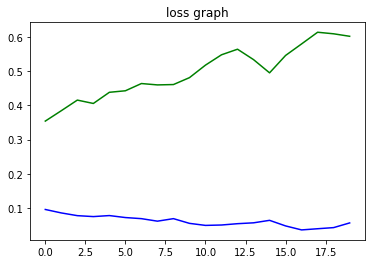

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'],label='loss',color='b')
plt.plot(hist['val_loss'],label='val_loss',color='g')
plt.title('loss graph')

Text(0.5, 1.0, 'accuracy graph')

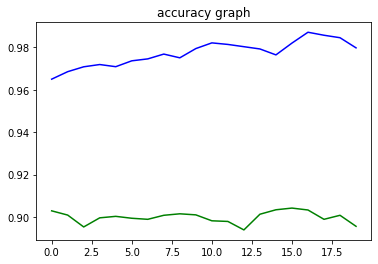

In [18]:
plt.plot(hist['accuracy'],label='accuracy',color='b')
plt.plot(hist['val_accuracy'],label='val_accuracy',color='g')
plt.title('accuracy graph')

In [20]:
y_act=ytest
y_predict=np.argmax(model.predict(xtest), axis=-1)
from sklearn.metrics import confusion_matrix

In [21]:
cf=confusion_matrix(ytest,y_predict)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f276a16c610>)

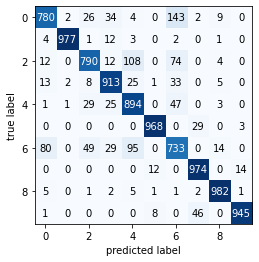

In [22]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)